# Machine Learning Project
## Predicting sleep quality
### By : Rebecca Maroun - Yasmine Dabachil - Thomas Boulaine
### Group : DIA4

1. Descriptive analysis of your data.
2. Implementation of the necessary pre-processing.
3. Formalisation of the problem.
4. Selection of a baseline model and implementation of the model.

## 1. Descriptive analysis of our data

In [ ]:
import pandas as pd

df = pd.read_csv("/content/synthetic_coffee_health_10000.csv")
df.head(10)

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
5,6,32,Male,Mexico,3.4,326.4,6.4,Good,27.0,82,Low,8.8,NaN,Service,0,0
6,7,53,Male,France,2.7,252.1,7.8,Good,24.3,58,Low,1.0,Mild,Student,1,0
7,8,44,Female,Canada,4.5,423.5,5.5,Fair,15.8,62,Medium,0.7,Mild,Service,1,1
8,9,29,Male,UK,1.7,162.0,7.1,Good,21.7,60,Low,2.2,NaN,Service,1,1
9,10,41,Female,Switzerland,4.0,383.2,6.4,Good,30.4,69,Low,11.9,Mild,Office,0,0


In [ ]:
print("Shape:",df.shape)
print("\nColumn dtypes:\n", df.dtypes)

Shape: (10000, 16)

Column dtypes:
 ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object


In [ ]:
df.columns

Index(['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg',
       'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

In [ ]:
nunique = df.nunique().sort_values(ascending=False)
print("\nUnique values per column:\n", nunique)


Unique values per column:
 ID                         10000
Caffeine_mg                 4277
BMI                          220
Physical_Activity_Hours      151
Coffee_Intake                 78
Sleep_Hours                   71
Age                           59
Heart_Rate                    58
Country                       20
Occupation                     5
Sleep_Quality                  4
Gender                         3
Stress_Level                   3
Health_Issues                  3
Smoking                        2
Alcohol_Consumption            2
dtype: int64


- The dataset contains 10 000 observations and 16 variables, all covering demographic lifestyle, health and sleep-related attributes of individuals.
- The data types confirm a mix of numeric(int64, float64) and categorical(object) variables.
- Each record is unique (10 000 distinct ID) wich is purely an identifier and can be droped later on.
- Sleep quality has 4 classes ( Excellent,Good,Fair,Poor) wich allows us to frame this as a multiclass classification problem.

In [ ]:
df.isna().mean().sort_values(ascending=False)

,0
Health_Issues,0.5941
ID,0.0000
Gender,0.0000
Age,0.0000
Coffee_Intake,0.0000
Caffeine_mg,0.0000
Sleep_Hours,0.0000
Country,0.0000
Sleep_Quality,0.0000
BMI,0.0000


In [ ]:
df.duplicated().sum()

np.int64(0)

The result show no missing values across any of the 16 columns and no duplicated rows in the dataset.
This indicates a high quality and complete dataset that is already quite clean.
The dataset can be used directly for exploratory analysis and modeling but we will still include a preprocessing pipeline to ensure consistency and reproducibility in a real-world workflow.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.250,10000.0
Age,10000.0,34.94910,11.160939,18.0,26.00,34.0,43.000,80.0
Coffee_Intake,10000.0,2.50923,1.450248,0.0,1.50,2.5,3.500,8.2
Caffeine_mg,10000.0,238.41101,137.748815,0.0,138.75,235.4,332.025,780.3
Sleep_Hours,10000.0,6.63622,1.222055,3.0,5.80,6.6,7.500,10.0
BMI,10000.0,23.98686,3.906411,15.0,21.30,24.0,26.600,38.2
Heart_Rate,10000.0,70.61780,9.822951,50.0,64.00,71.0,77.000,109.0
Physical_Activity_Hours,10000.0,7.48704,4.315180,0.0,3.70,7.5,11.200,15.0
Smoking,10000.0,0.20040,0.400320,0.0,0.00,0.0,0.000,1.0
Alcohol_Consumption,10000.0,0.30070,0.458585,0.0,0.00,0.0,1.000,1.0


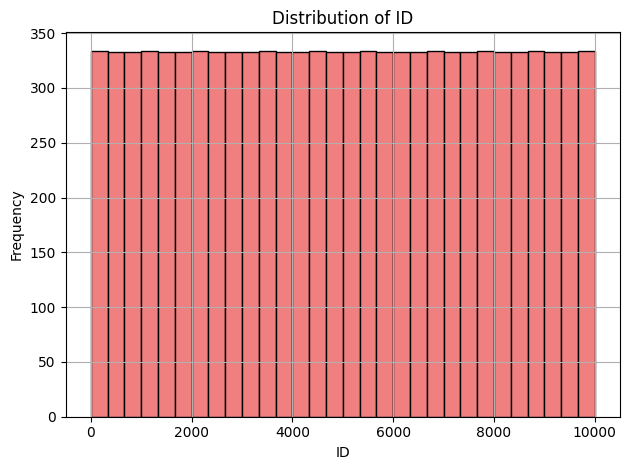

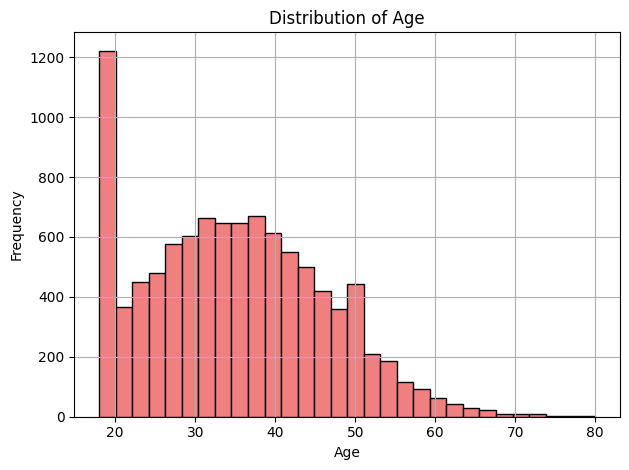

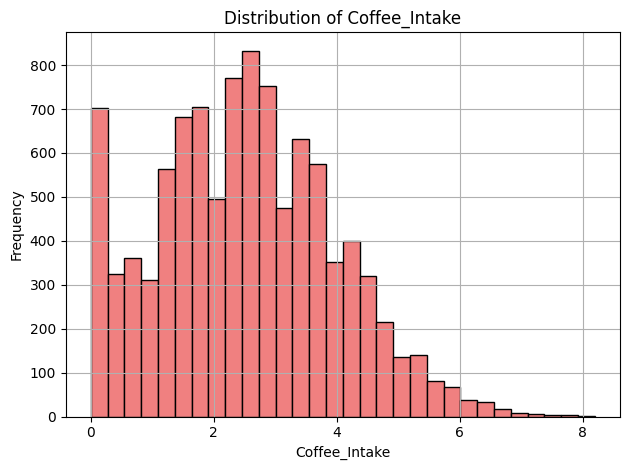

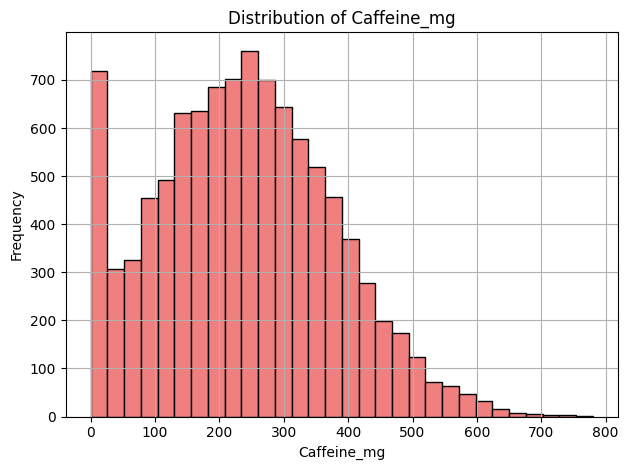

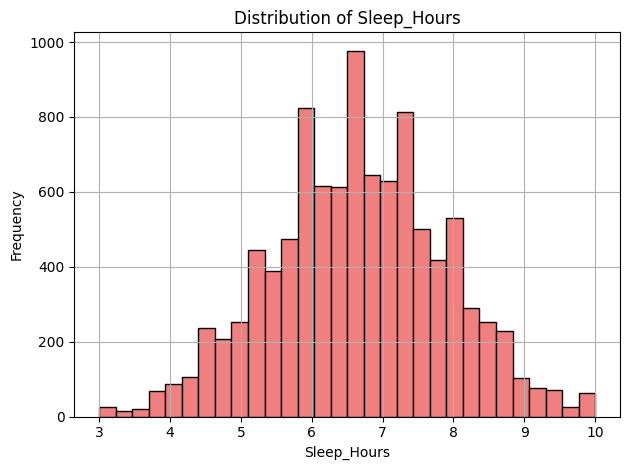

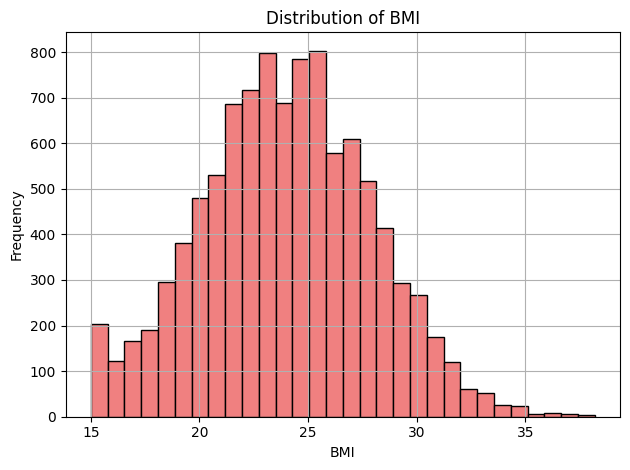

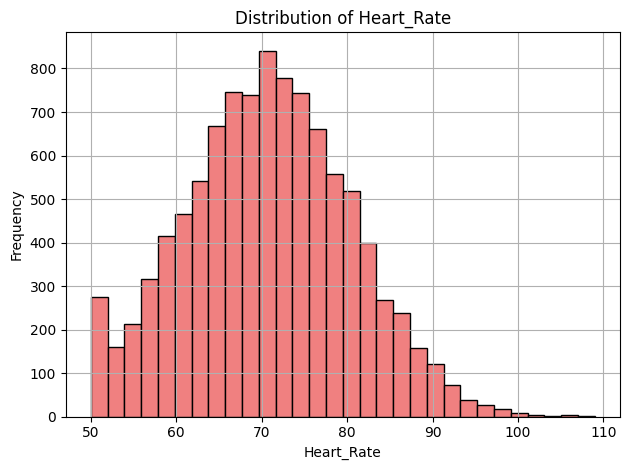

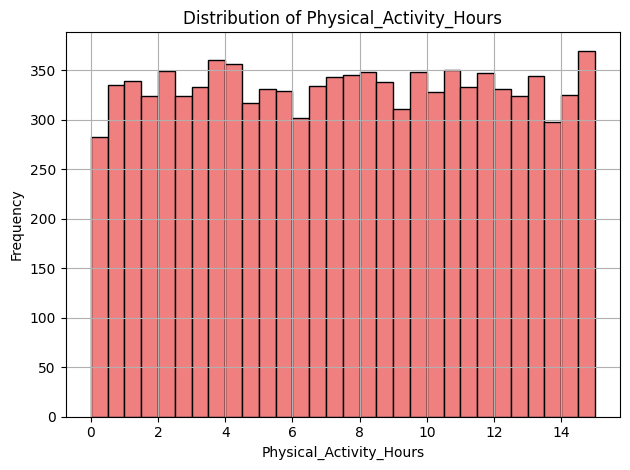

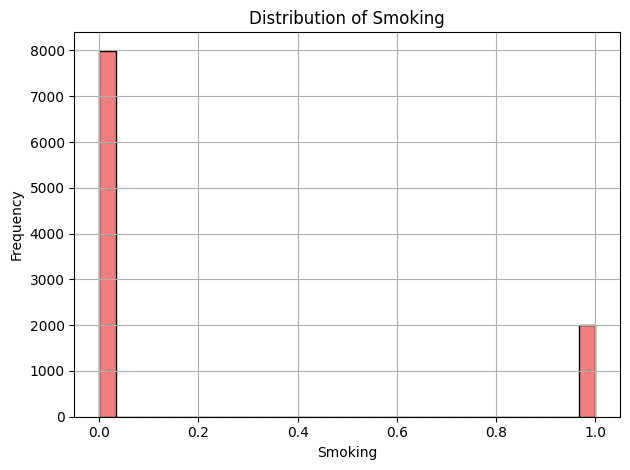

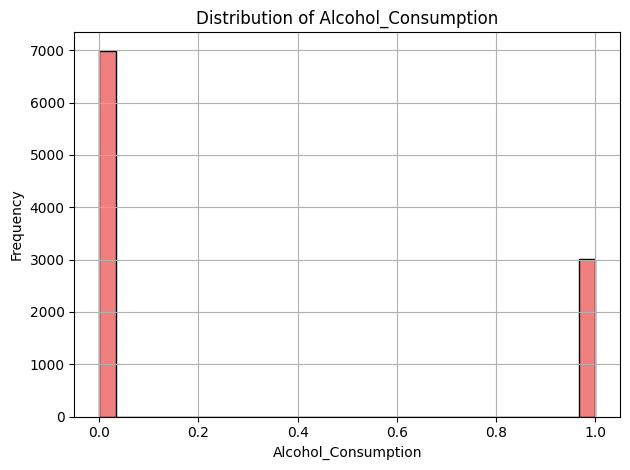

In [ ]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=30, color='lightcoral', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


#### Distribution of Numerical Variables

1. *ID* : Confirms that it's only a unique identifier. We will drop this column before modeling since it carries no predictive information
2. *Age* : Ranges between 18 and 80 years old. The distribution is right-skewed with most individuals in their 20s to 40s. The pattern reflects a younger adult population. We can check later on wether sleep quality deteriorates with age.
3. *Coffee_Intake* (cups/day) : Ranges between 0 to 8 cups per day. Slightly to the right meaning people drink moderate amounts(1-3 cups) and not many are heavy consumers. This could be a useful behavior feature for explaining sleep differences.
4. *Caffeine_mg* : Ranges between 0 to 780 mg. This column looks like it could be strongly correlated with Coffee_Intake but we will confirm this more later on with the correlation matrix. We could potentially drop one of them or combine them in a new engineered feature.
5. *Sleep_Hours* : Ranges between 3 to 10 hours of sleep and it's mostly centered around6-7h. A healthy adult is expected to sleep around this amount of hours so this looks realistic.
6. *BMI* : Ranges between 15 and 38 so it covers underweight to obese categories. From now we can see that this feature will require normalization because BMI scale differs from the other features.
7. *Heart_Rate* : Ranges drom 50-110 bpm and centered around 70 bpm. A potential indicator of overall fitness or stress.
8. *Physical_Activity_Hours* : Rangegs between 0 to 15 hours per week and looks uniformly distributed. This indicates that the dataset was designed to cover all activity levels evenly to avoid bias. We can group this later into categories for easier interpretability.
9. *Smoking* : 0 for non smokers and 1 for smokers. About 80% are and 20% are not smokers. This shows a very strong imbalance and could be relevant for health outcomes so we will keep it as binary.
10. *Alcohol_Consumption* : Also 0 for no and 1 for yes. Like the previous one is binary and slightly imbalanced wich may affect ssleep patterns.

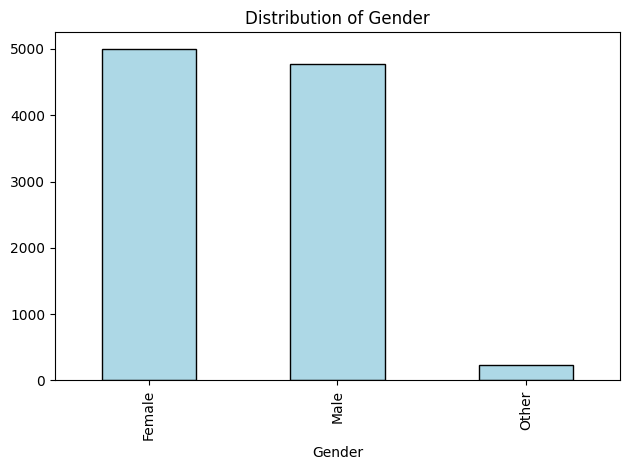

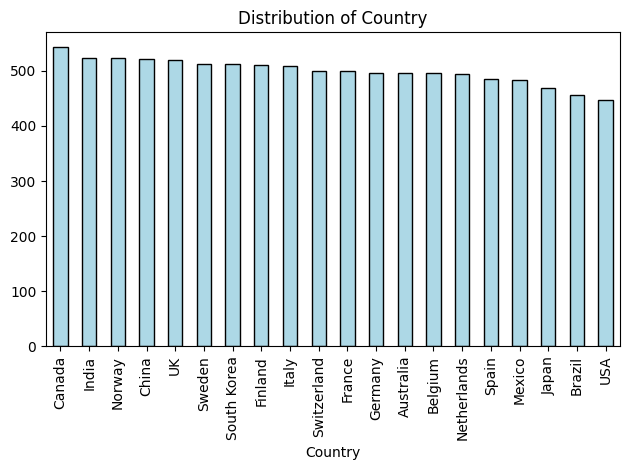

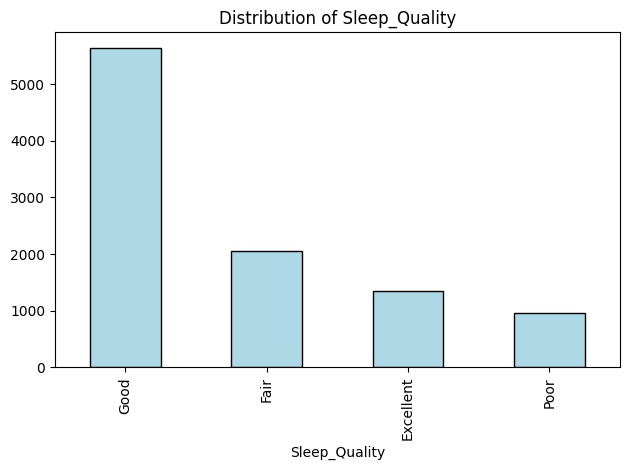

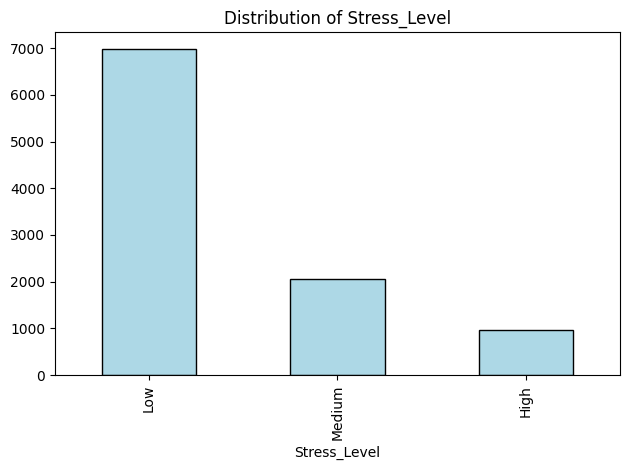

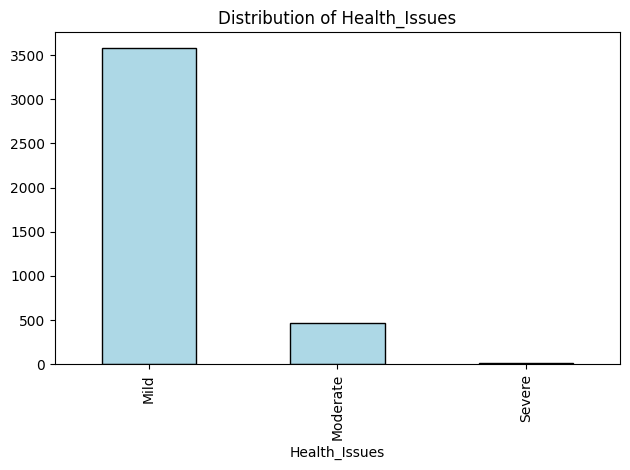

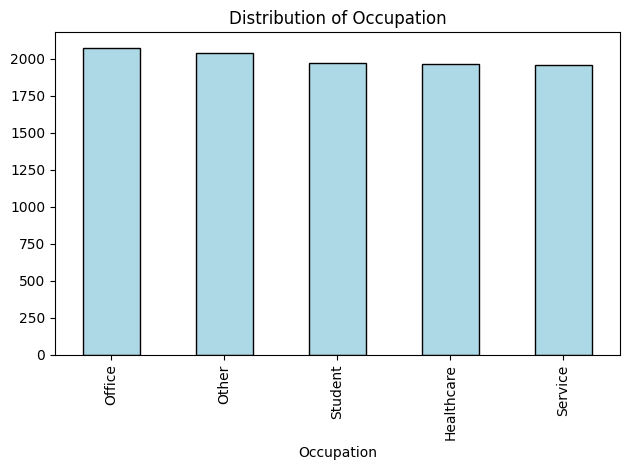

In [ ]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


#### Distribution of Categorical Variables

1. *Gender* : We have Female,Male,Other. The distribution is well balanced between male and female while the Other class is much smaller. This should not impact the model since gender is not the target variable but could affect one-hot encoding.
2. *Country* : The dataset includes 20 countries each with around 450 and 550 individuals.This is a balanced categorical variable wich is very unusual in real-world datasets but beneficial here because we don't have any domination or risk of extreme sparsity after one-hot encoding. This balance proves further more that the dataset is synthesized to avoid geographic bias.
3. *Sleep_Quality* : Our target Variable . Good~5500 , Fair~2000, Excellent~1400, Poor~900. It's quite a moderate class imbalance with "Good" being the majority class but enough to require a careful evaluation of metrics.
4. *Stress_Level* : Three level appears. Low,Medium and high with the distribution being heavily skewed toward low stress. We cn check later wether stress interacts with caffeine intake in affecting sleep quality. Because this variable is categorical the imbalance will not directly affect the training but class-weighting may help models better interpret this feature.
5. *Health_Issues* : We find 3 categories : Mild,Moderate and Severe. This feature is highly imbalanced with Severe health issues being extremely rare. This can have different consequences : we may need to merge Moderate with Severe into a single group during preprocessing for more stability.
6. *Occupation* : All are represented quite equally so it's very well balanced with diversity so the model can learn occupation .

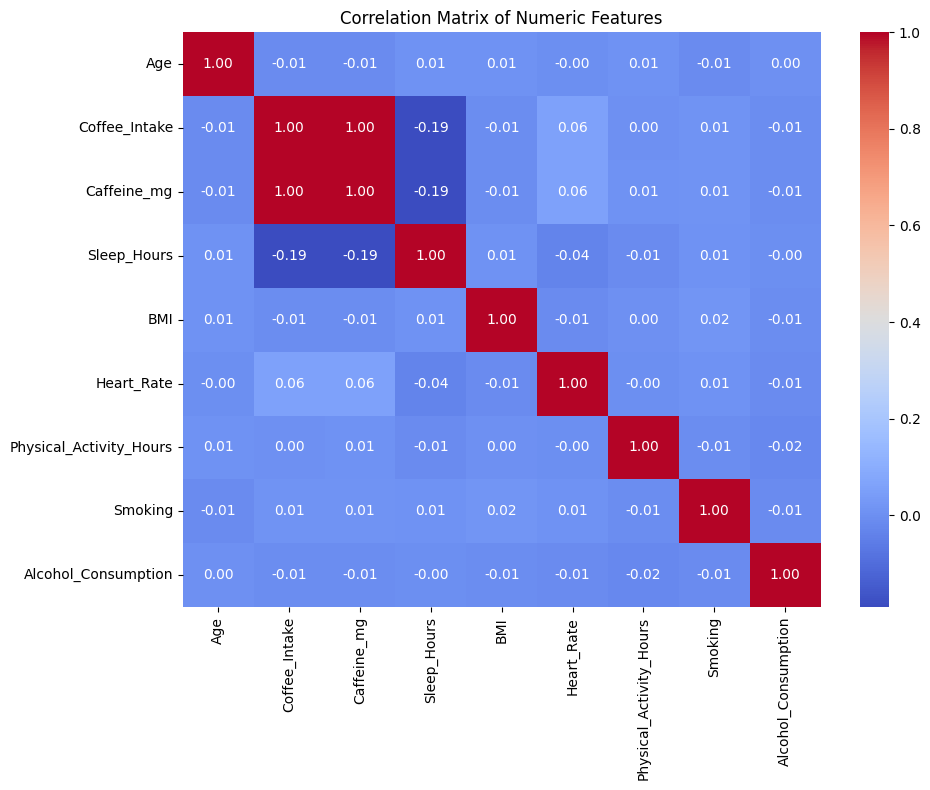

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation à partir des colonnes numériques
corr = df.drop(columns=['ID']).select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

The correlation matrix highlights several important patterns in the dataset :
- As expected, we have an extremely strong correlation between Coffee_Intake and Caffeine_mg. This indicates that these 2 variables are perfectly correlated in the dataset. Most likely they represent the same information just in different units. Keeping both may introduce redundancy so we can either remove one or engineer a new like we said beofre so that the feature is more informative such as : Total_Caffeine=Coffee_Intake x Caffeine_mg
- Both Coffee_Intake and Caffeine_mg show a very small negative correlation with Sleep_Hours. This shows that sleep behavior depends on many lifestyle and individual factors but caffeine contribute some power but it's not in any way deterministic.
- Variables like BMI,Heart_Rate,Physical_Activity_Hours_Smoking and Alcohol_Consumption all show correlations close to 0. This is ideal to choose a first model like Logistic Regression, SVM, Random Forests.. since the features are mostly independent.
- Age is almost uncorrelated with sleep or caffeine variables so it's not a useful predictor in this dataset.
- No other feature other than caffeine shows correlation above 0.2. This means that the dataset is not dominated by linear independencies and in this case non-linear models may reveal more useful patterns than other. PCA will probably not reduce dimensionality much because we havevery low linear correlations.
- In summary, the dataset contains low correlation except for coffee features. All this, justifies exploring feature engineering and clustering to capture more complex relationships.

## 2. Implementation of the necessary pre-processing.

After analysing the dataset comes the part to transform our dataset into a model ready pipeline for our models.

In [ ]:
# we drop ID column
df = df.drop(columns=['ID'])

Our project uses 2 predictions tasks:
- Multiclass Classification : To predict one of 4 levels of sleep quality so we will encode them as orderes integers between 0 and 3 for each level.
- Binary Classification : In addition we prepared a simple binary target (Good or Excellent -> 1 and Poor or Fair -> 0 )

In [ ]:
# Multiclass target encoding
mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
df['Sleep_Quality_Multi'] = df['Sleep_Quality'].map(mapping)

# Binary target encoding
df['Sleep_Quality_Binary'] = df['Sleep_Quality'].replace({
    'Poor': 0, 'Fair': 0,
    'Good': 1, 'Excellent': 1
})


/tmp/ipython-input-3144682968.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep_Quality_Binary'] = df['Sleep_Quality'].replace({


The feature "Stress_Level" is an ordered categorical variable (Low < Medium < High) so we use OrdinalEncoder to preserve this order unlike one-hot encoding that doesn't.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding for Stress_Level
ord_enc = OrdinalEncoder(categories=[['Low','Medium','High']])
df['Stress_Level_Enc'] = ord_enc.fit_transform(df[['Stress_Level']])

# Remove original version
df = df.drop(columns=['Stress_Level'])


The other variables ( Gender,Countr,Occupation,Health_Issues) do not have a specific order that's why we use one-hot encoding. OneHotEncoder converts categories into binary vectors.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['Gender', 'Country', 'Occupation', 'Health_Issues']

# OneHotEncoder: transform categorical variables into binary columns
ohe = OneHotEncoder(drop='first', #prevents dummy variable trap and is good for linear models
                    sparse_output=False) # required to convert into DataFrame
encoded = ohe.fit_transform(df[cat_cols])

# Convert to DataFrame
ohe_df = pd.DataFrame(encoded,
                      columns=ohe.get_feature_names_out(cat_cols),
                      index=df.index) #very important this aligns rows and avoid shape mismatch

# Concatenate with original df
df = pd.concat([df.drop(columns=cat_cols), ohe_df], axis=1)


In the next cell we seperate numerical features to scale them later and so we use StandardScaler

In [ ]:
num_cols = ['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours',
            'BMI', 'Heart_Rate', 'Physical_Activity_Hours']


But it's important that before scaling we seperate the dataset to prevent data leakage.

In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) exclude targets and the original Sleep_Quality
X = df.drop(columns=['Sleep_Quality','Sleep_Quality_Multi','Sleep_Quality_Binary'])


In [ ]:
# For Multiclass
y_multi = df['Sleep_Quality_Multi']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X, y_multi,
    test_size=0.2,
    stratify=y_multi, # we use stratify to preserve class proportionsin both training and test sets.
    random_state=42
)


In [ ]:
# For Binary
y_binary = df['Sleep_Quality_Binary']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X, y_binary, test_size=0.2, stratify=y_binary, random_state=42
)


Now that we seperated the data we start the scaling but only on numerical columns and for the training data to prevent leakage.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Multiclass scaling
scaler_m = StandardScaler()
X_train_m[num_cols] = scaler_m.fit_transform(X_train_m[num_cols]) #we only fit on the training set
X_test_m[num_cols] = scaler_m.transform(X_test_m[num_cols]) # we apply transform to the test

# Binary scaling
scaler_b = StandardScaler()
X_train_b[num_cols] = scaler_b.fit_transform(X_train_b[num_cols])
X_test_b[num_cols] = scaler_b.transform(X_test_b[num_cols])


In [ ]:
df.columns

Index(['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'Sleep_Quality',
       'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking',
       'Alcohol_Consumption', 'Sleep_Quality_Multi', 'Sleep_Quality_Binary',
       'Stress_Level_Enc', 'Gender_Male', 'Gender_Other', 'Country_Belgium',
       'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_Finland',
       'Country_France', 'Country_Germany', 'Country_India', 'Country_Italy',
       'Country_Japan', 'Country_Mexico', 'Country_Netherlands',
       'Country_Norway', 'Country_South Korea', 'Country_Spain',
       'Country_Sweden', 'Country_Switzerland', 'Country_UK', 'Country_USA',
       'Occupation_Office', 'Occupation_Other', 'Occupation_Service',
       'Occupation_Student', 'Health_Issues_Moderate', 'Health_Issues_Severe',
       'Health_Issues_nan'],
      dtype='object')

All these steps are now completed and we can start implementing baseline models and later advanced methods to our dataset because we :
- Cleaned the dataset
- encoded categorical variables and targets
- scaled numerical features
- split the dataset


## 3. Formalisation of the problem.

This step is very important because will help us define what type of machine learning task we are trying to solve, what is our objective and explain why these tasks are relevant in our contexte.

### Main problem : Multiclass Classification
Our main objective is to predict the Sleep Quality of individuals based on their lifestyle, caffeine consumption and overall health indicators.
Our target variable "Sleep_Quality" contains four ordered categories :
- Poor
- Fair
- Good
- Excellent
That's why we chose a multiclass classification problem where the model has to assign a category foe each observation.

Why did we choose multiclass classification?

Mostly because to be able to predict sleep quality won't just stop here but will help us identify risk profiles for future preventions.

This will be our baseline model.

### Secondary Problem : Binary Classification

To simplify the sleep prediction task, we also create a binary classification of the target :
- Good sleep -> Good or Excellent
- Bad sleep -> Poor or Fair

This transforms the problem into a binary classification task.

Why binary classification?

This formulation hels us distinguish in a more useful way acceptable and problematic sleep patterns. In addition to that, binary classification often improves baseline accuracy and model stability and allows us to explore different evaluation metrics (ROC-AUC , F1-score).

This clssification will act as a simlified model that can be compared to the multiclass approach.


### Advanced problem : ??????????????????

## 4. Baseline models and implementation of the models

In this step, we train our first machine learning models on the preprocessed dataset.
The objective is to :
- establish baseline performance,
- evaluate simple models using default hyperparameters,
- compare results across different algorithms,
- prepare the ground for future improvements

We are going to build models for both tasks , Multiclass prediction and binary .

The models used are going to be :
- DummyClassifier (reference baseline)
(The dummy classifier is not a real model but we will use it to create a baseline reference that does something really stupid. We will need it to prove that our models are not useless.)
- Logistic Regression
- Decision Tree
- Random Forest

In [ ]:
# necessary imports
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


To avoid repeating code for every model since we will be using a few we decided to define a simple function that :
- trains the model,
- predicts on the test set,
- computes accuracy and macro F1-score,
- prints the classification report,
- displays the confusion matrix

In [ ]:
def evaluate_classifier(model, X_train, y_train, X_test, y_test, title="", show_cm=False):
    # Training
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"=== {title} ===")
    print(f"Accuracy     : {acc:.3f}")
    print(f"F1 Macro     : {f1:.3f}")
    print("-----------------------------")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    if show_cm:
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.title(f"Confusion Matrix — {title}")
        plt.show()

    return acc, f1


Now we will implement the dummy classifier that will serve as a reference baseline by predicting the most frequent class in the training set.
Later a real model must outperform this dummy baseline to be considered useful.

=== Dummy Classifier (Multiclass) ===
Accuracy     : 0.564
F1 Macro     : 0.180
-----------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.00      0.00      0.00       410
           2       0.56      1.00      0.72      1128
           3       0.00      0.00      0.00       270

    accuracy                           0.56      2000
   macro avg       0.14      0.25      0.18      2000
weighted avg       0.32      0.56      0.41      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


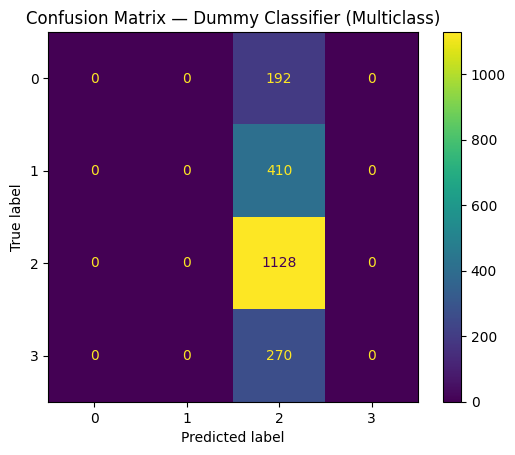

=== Dummy Classifier (Binary) ===
Accuracy     : 0.699
F1 Macro     : 0.411
-----------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       602
           1       0.70      1.00      0.82      1398

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.49      0.70      0.58      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


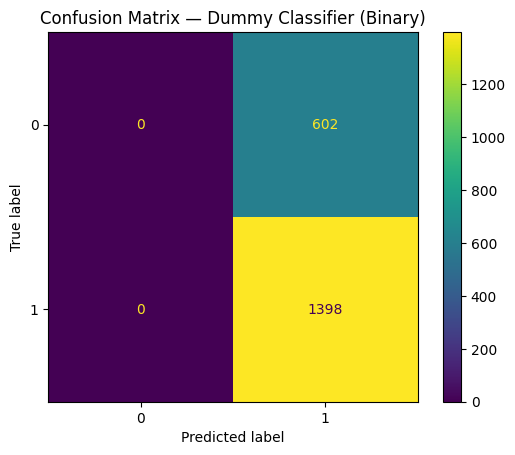

(0.699, 0.4114184814596822)

In [ ]:
# Multiclass dummy
dummy_multi = DummyClassifier(strategy="most_frequent")
evaluate_classifier(dummy_multi, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Dummy Classifier (Multiclass)", show_cm=True)

# Binary dummy
dummy_bin = DummyClassifier(strategy="most_frequent")
evaluate_classifier(dummy_bin, X_train_b, y_train_b, X_test_b, y_test_b,
                    title="Dummy Classifier (Binary)", show_cm=True)


#### Result interpretation :

*Multiclass :
Accuracy     : 0.564
F1 Macro     : 0.180
Confusion matrix: predicts only class 2 which is the "Good" class for everyone.
This confirms that "Good" is the majority class in the multiclass target.
So any real model must beat these scores. If a model has higher accuracy but similar F1 it's still biased towards the majority class.

*Binary :
Accuracy     : 0.699
F1 Macro     : 0.411
Confusion matrix: it always predicts 1 (good sleep).
So predicting good sleep already gives around 70% accuracy but it totally fails to detect bad sleepers.
Any real binary model must beat 70% accuracy and especially improve F1 macro > 0.41 and show detections 0 in the confusion matrix.

So these dummy results are exactly what we wanted. They show that our data is imbalanced towards good sleep and give us numbers to compare the real models with.

#### Baseline Models for Multiclass Sleep Quality Prediction

We now train the models on the multiclass target. We chose those models:

-Logistic Regression

-Decision Tree

-Random Forest

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression (Multiclass) ===
Accuracy     : 0.992
F1 Macro     : 0.990
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      0.99      0.99      1128
           3       0.97      0.97      0.97       270

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



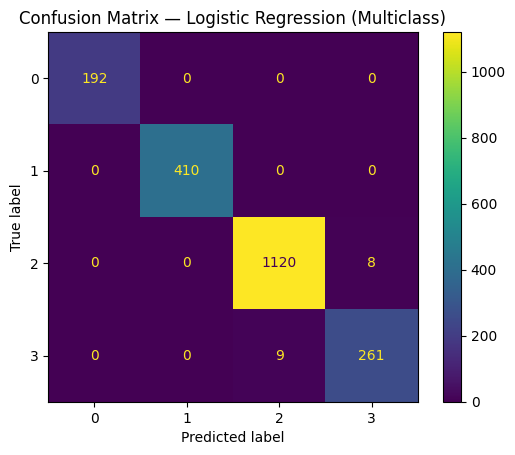

(0.9915, 0.9902319972577585)

In [ ]:
# Logistic regression
log_reg_multi = LogisticRegression(max_iter=500, multi_class='multinomial')
evaluate_classifier(log_reg_multi, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Logistic Regression (Multiclass)", show_cm=True)


=== Decision Tree (Multiclass) ===
Accuracy     : 0.989
F1 Macro     : 0.987
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      0.99      0.99      1128
           3       0.95      0.97      0.96       270

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



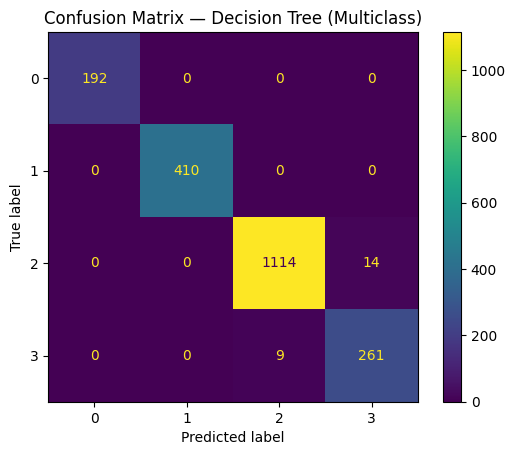

(0.9885, 0.9868951210267404)

In [ ]:
# Decision tree
dt_multi = DecisionTreeClassifier(random_state=42)
evaluate_classifier(dt_multi, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Decision Tree (Multiclass)", show_cm=True)


=== Random Forest (Multiclass) ===
Accuracy     : 0.993
F1 Macro     : 0.991
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      1.00      0.99      1128
           3       1.00      0.95      0.97       270

    accuracy                           0.99      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



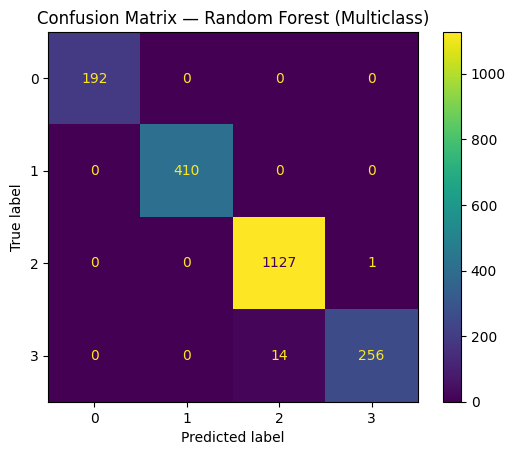

(0.9925, 0.9912315400292533)

In [ ]:
# Random Forest
rf_multi = RandomForestClassifier(random_state=42)
evaluate_classifier(rf_multi, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Random Forest (Multiclass)", show_cm=True)


#### Result Interpretation Multiclass:

*Logistic regression :
Accuracy     : 0.992
F1 Macro     : 0.990

This is extremely high.
Confusion matrix : Everything is almost perfect except: 8 misclassified in class 2 → predicted as class 3, but this is still nothing.
So the data is extremely easy to seperate and it's a sign of a synthetic dataset with clean, linear separability.


*Decision tree:
Accuracy     : 0.989
F1 Macro     : 0.987

Confusion matrix: Very few errors. Structure very similar to logistic regression, but slightly more mistakes.
Decision Trees can sometimes overfit on synthetic linear-like data but here it looks like it generalizes well.


*Random forest:
Accuracy     : 0.993
F1 Macro     : 0.991

This is the best out of the 3 models so far but the differences are very small.
Confusion matrix : The erors occur mostly between Good and Excellent and the difference between classes 2 and 3 is the hardest for the model.


But because this dataset is synthetic there is high chance the relationships between features and sleep quality are very strong, linear and clean, without any noise. This is why logistic-regression has near-perfect accuracy, decision trees also perform extremely well.

#### Baseline Models for Binary Classification

We repeat the same models but this time for the binary classification.
Binary classification often provides stronger performance because of the reduced complexity.


=== Logistic Regression (Binary) ===
Accuracy     : 1.000
F1 Macro     : 1.000
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       1.00      1.00      1.00      1398

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



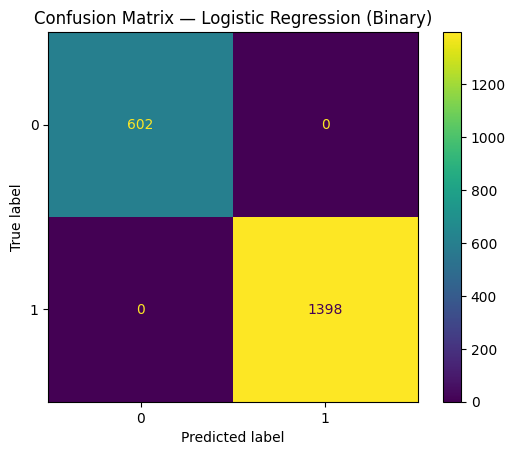

(1.0, 1.0)

In [ ]:
# Logistic regression
log_reg_bin = LogisticRegression(max_iter=500)
evaluate_classifier(log_reg_bin, X_train_b, y_train_b, X_test_b, y_test_b,
                    title="Logistic Regression (Binary)", show_cm=True)


=== Decision Tree (Binary) ===
Accuracy     : 1.000
F1 Macro     : 1.000
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       1.00      1.00      1.00      1398

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



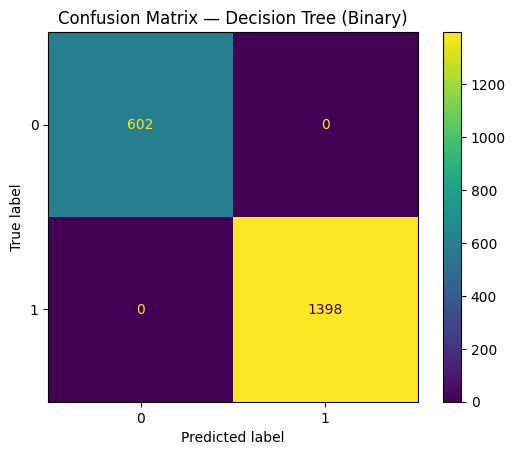

(1.0, 1.0)

In [ ]:
# Decision tree
dt_bin = DecisionTreeClassifier(random_state=42)
evaluate_classifier(dt_bin, X_train_b, y_train_b, X_test_b, y_test_b,
                    title="Decision Tree (Binary)", show_cm=True)


=== Random Forest (Binary) ===
Accuracy     : 1.000
F1 Macro     : 1.000
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       1.00      1.00      1.00      1398

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



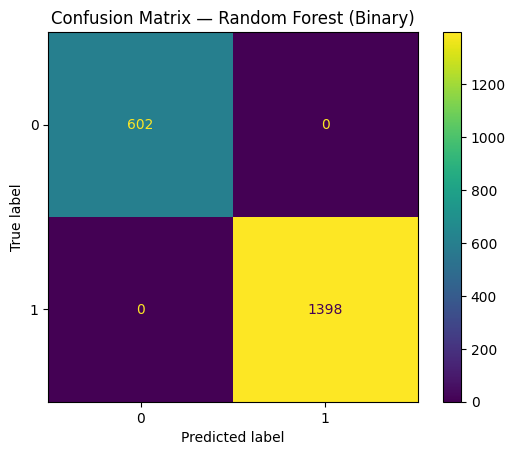

(1.0, 1.0)

In [ ]:
# Random forest
rf_bin = RandomForestClassifier(random_state=42)
evaluate_classifier(rf_bin, X_train_b, y_train_b, X_test_b, y_test_b,
                    title="Random Forest (Binary)", show_cm=True)


#### Result interpretation:
These binary classification results are perfect for all three models.
This is not normal for real-world data.
But since we are using a synthetic dataset it's expected and explainable and can be turned in a advantage if we justify it correctly.
The dataset is perfectly linearly seperable for the binary task and this behavior is characteristic of synthetic datasets which often encode relationships between features and target labels using deterministic rules. As a result, the dataset exhibits a very strong signal, minimal overlap between classes and clean and consistent boundaries.
This allows machine learning models to acheive perfect performance.

Despite these excellent results, they highlight an important limitation:
the dataset does not reflect real-world sleep data where noise, human variability and measurement uncertainty reduce usually model performance.

#### Baseline results :
We summarize all the scores in a table to see nd comapre better for the multiclass prediction and binary prediction.
In addition, this table will help us select which models deserve hyperparameter tuning in the next step.

In [ ]:
import pandas as pd

results = []

# Multiclass models
for name, model in [
    ("Dummy (multi)", DummyClassifier(strategy="most_frequent")),
    ("LogReg (multi)", LogisticRegression(max_iter=500, multi_class='multinomial')),
    ("DT (multi)", DecisionTreeClassifier(random_state=42)),
    ("RF (multi)", RandomForestClassifier(random_state=42)),
]:
    acc, f1 = evaluate_classifier(model, X_train_m, y_train_m, X_test_m, y_test_m, show_cm=False, title=name)
    results.append(["Multiclass", name, acc, f1])

# Binary models
for name, model in [
    ("Dummy (bin)", DummyClassifier(strategy="most_frequent")),
    ("LogReg (bin)", LogisticRegression(max_iter=500)),
    ("DT (bin)", DecisionTreeClassifier(random_state=42)),
    ("RF (bin)", RandomForestClassifier(random_state=42)),
]:
    acc, f1 = evaluate_classifier(model, X_train_b, y_train_b, X_test_b, y_test_b, show_cm=False, title=name)
    results.append(["Binary", name, acc, f1])

results_df = pd.DataFrame(results, columns=["Task", "Model", "Accuracy", "F1_macro"])
results_df


=== Dummy (multi) ===
Accuracy     : 0.564
F1 Macro     : 0.180
-----------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.00      0.00      0.00       410
           2       0.56      1.00      0.72      1128
           3       0.00      0.00      0.00       270

    accuracy                           0.56      2000
   macro avg       0.14      0.25      0.18      2000
weighted avg       0.32      0.56      0.41      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/l

=== LogReg (multi) ===
Accuracy     : 0.992
F1 Macro     : 0.990
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      0.99      0.99      1128
           3       0.97      0.97      0.97       270

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

=== DT (multi) ===
Accuracy     : 0.989
F1 Macro     : 0.987
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      0.99      0.99      1128
           3       0.95      0.97      0.96       270

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


=== RF (bin) ===
Accuracy     : 1.000
F1 Macro     : 1.000
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       1.00      1.00      1.00      1398

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



,Task,Model,Accuracy,F1_macro
0,Multiclass,Dummy (multi),0.5640,0.180307
1,Multiclass,LogReg (multi),0.9915,0.990232
2,Multiclass,DT (multi),0.9885,0.986895
3,Multiclass,RF (multi),0.9925,0.991232
4,Binary,Dummy (bin),0.6990,0.411418
5,Binary,LogReg (bin),1.0000,1.000000
6,Binary,DT (bin),1.0000,1.000000
7,Binary,RF (bin),1.0000,1.000000


To conclude this part : Baseline models acheive nearly perfect performance due to the clean, noise-free nature of the synthetic dataset. This allows us to focus the rest of the project on advanced modeling techniques, more interpretability and methodological improvements rather than just accuracy gains.

# Phase 5 (overfitting and underfitting)

In [ ]:
#We compare test and train using our previous models
def evaluate_classifier_train_test(model, X_train, y_train, X_test, y_test, title=""):
    model.fit(X_train, y_train)

    # Scores train et test
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    print(f"=== {title} ===")
    print(f"Train Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy : {test_acc:.3f}")
    print("-----------------------------")

    return train_acc, test_acc

# Exemple pour Decision Tree multiclass
evaluate_classifier_train_test(dt_multi, X_train_m, y_train_m, X_test_m, y_test_m, title="Decision Tree (Multiclass)")


=== Decision Tree (Multiclass) ===
Train Accuracy: 1.000
Test Accuracy : 0.989
-----------------------------


(1.0, 0.9885)

Le modèle Decision Tree (Multiclass) présente une précision parfaite sur l’entraînement (1.00) mais légèrement plus faible en test (≈ 0.99), ce qui indique qu’il apprend très bien les données et ne montre qu’un léger début d’overfitting, mais globalement il généralise encore très bien.

In [ ]:
for depth in range(1, 11):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    evaluate_classifier_train_test(dt, X_train_m, y_train_m, X_test_m, y_test_m,
                                   title=f"Decision Tree Depth={depth} (Multiclass)")


=== Decision Tree Depth=1 (Multiclass) ===
Train Accuracy: 0.769
Test Accuracy : 0.769
-----------------------------
=== Decision Tree Depth=2 (Multiclass) ===
Train Accuracy: 0.992
Test Accuracy : 0.992
-----------------------------
=== Decision Tree Depth=3 (Multiclass) ===
Train Accuracy: 0.992
Test Accuracy : 0.992
-----------------------------
=== Decision Tree Depth=4 (Multiclass) ===
Train Accuracy: 0.993
Test Accuracy : 0.989
-----------------------------
=== Decision Tree Depth=5 (Multiclass) ===
Train Accuracy: 0.993
Test Accuracy : 0.989
-----------------------------
=== Decision Tree Depth=6 (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.990
-----------------------------
=== Decision Tree Depth=7 (Multiclass) ===
Train Accuracy: 0.995
Test Accuracy : 0.989
-----------------------------
=== Decision Tree Depth=8 (Multiclass) ===
Train Accuracy: 0.997
Test Accuracy : 0.987
-----------------------------
=== Decision Tree Depth=9 (Multiclass) ===
Train Accuracy: 0.998

Les résultats montrent que l’arbre très peu profond (depth=1) sous-apprend nettement (train = test = 0.77), tandis qu’à partir de depth=2, le modèle atteint une excellente performance et reste bien généralisant ; ensuite, en augmentant la profondeur (depth ≥ 4), l’accuracy d’entraînement continue d’augmenter presque jusqu’à 1.00, mais l’accuracy test stagne voire diminue légèrement, indiquant qu’une profondeur comprise entre 2 et 4 constitue le meilleur compromis avant que l’overfitting ne commence à apparaître.

In [ ]:
#We analyze the depth of trees
for C in [0.01, 0.1, 1, 10, 100]:
    log_reg = LogisticRegression(C=C, max_iter=500, multi_class='multinomial')
    evaluate_classifier_train_test(log_reg, X_train_m, y_train_m, X_test_m, y_test_m,
                                   title=f"Logistic Regression C={C} (Multiclass)")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression C=0.01 (Multiclass) ===
Train Accuracy: 0.968
Test Accuracy : 0.968
-----------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression C=0.1 (Multiclass) ===
Train Accuracy: 0.991
Test Accuracy : 0.990
-----------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression C=1 (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.992
-----------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression C=10 (Multiclass) ===
Train Accuracy: 0.995
Test Accuracy : 0.991
-----------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression C=100 (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.991
-----------------------------


La régression logistique montre que la régularisation forte (C=0.01) entraîne un léger sous-apprentissage, tandis que les valeurs de C entre 0.1 et 1 offrent le meilleur équilibre avec une excellente généralisation (≈ 0.99). Pour des valeurs très élevées de C (10–100), le modèle commence à sur-ajuster légèrement les données d’entraînement sans améliorer les performances test, indiquant qu’un C autour de 1 est optimal.

In [ ]:
#Regularization for logistic regression
for C in [0.01, 0.1, 1, 10, 100]:
  log_reg = LogisticRegression(C=C, max_iter=500, multi_class='multinomial')
  evaluate_classifier_train_test(log_reg, X_train_m, y_train_m, X_test_m, y_test_m,
                                   title=f"Logistic Regression C={C} (Multiclass)")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression C=0.01 (Multiclass) ===
Train Accuracy: 0.968
Test Accuracy : 0.968
-----------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression C=0.1 (Multiclass) ===
Train Accuracy: 0.991
Test Accuracy : 0.990
-----------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression C=1 (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.992
-----------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression C=10 (Multiclass) ===
Train Accuracy: 0.995
Test Accuracy : 0.991
-----------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression C=100 (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.991
-----------------------------


In [ ]:
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    svm = SVC(kernel=k, C=1)
    evaluate_classifier_train_test(svm, X_train_m, y_train_m, X_test_m, y_test_m,
                                   title=f"SVM Kernel={k} (Multiclass)")

=== SVM Kernel=linear (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.991
-----------------------------
=== SVM Kernel=poly (Multiclass) ===
Train Accuracy: 0.994
Test Accuracy : 0.983
-----------------------------
=== SVM Kernel=rbf (Multiclass) ===
Train Accuracy: 0.996
Test Accuracy : 0.987
-----------------------------
=== SVM Kernel=sigmoid (Multiclass) ===
Train Accuracy: 0.891
Test Accuracy : 0.892
-----------------------------


Les résultats montrent que le kernel linéaire offre le meilleur compromis avec une excellente généralisation (train 0.994, test 0.991). Le kernel RBF performe bien mais commence à légèrement sur-apprendre (train 0.996 > test 0.987), tandis que le kernel polynomial souffre d’une baisse de performance en test (0.983), indiquant un sur-ajustement plus marqué. Enfin, le kernel sigmoid est clairement le moins performant, révélant un important sous-apprentissage. Globalement, le kernel linéaire est le plus adapté à ce problème.

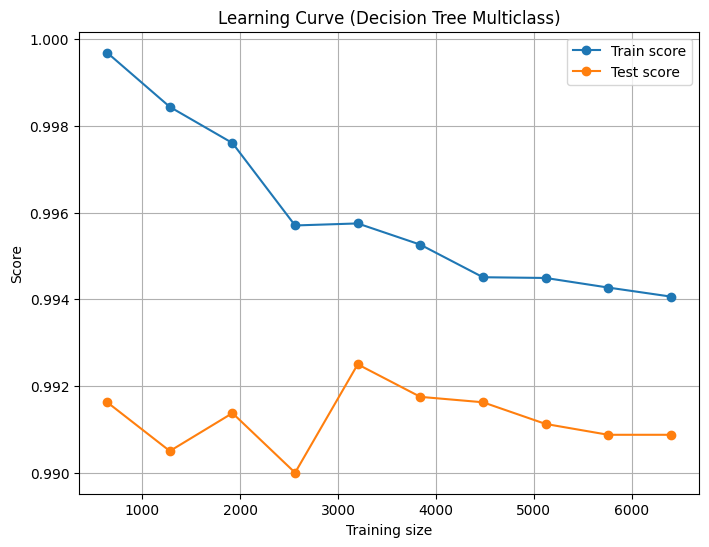

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

model = DecisionTreeClassifier(max_depth=5, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_m, y_train_m, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Train score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Test score')
plt.xlabel("Training size")
plt.ylabel("Score")
plt.title("Learning Curve (Decision Tree Multiclass)")
plt.legend()
plt.grid(True)
plt.show()


#Phase 6:Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.naive_bayes import GaussianNB


Best Decision Tree params: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}
=== Decision Tree — Tuned ===
Accuracy     : 0.989
F1 Macro     : 0.988
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      0.99      0.99      1128
           3       0.95      0.97      0.96       270

    accuracy                           0.99      2000
   macro avg       0.98      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



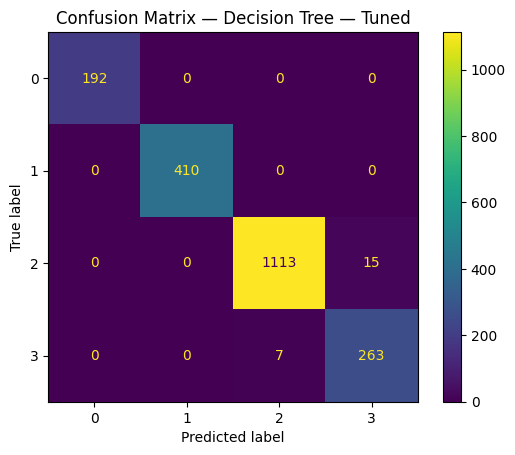

(0.989, 0.9875168844325531)

In [ ]:
#Decision tree Tuning
param_dt = {
    "max_depth": [2, 4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "criterion": ["gini", "entropy"]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_dt,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_dt.fit(X_train_m, y_train_m)

print("Best Decision Tree params:", grid_dt.best_params_)
best_dt = grid_dt.best_estimator_

evaluate_classifier(best_dt, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Decision Tree — Tuned", show_cm=True)


In [ ]:
#Random forest hyperparameter tuning
param_rf = {
    "n_estimators": [200, 300,400],
    "max_depth": [2,4, 6],
    "max_features": ["sqrt", "log2"]
}
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_rf,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1)

In [ ]:
grid_rf.fit(X_train_m, y_train_m)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400]},
             scoring='f1_macro')

Best Random Forest params: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 300}
=== Random Forest — Tuned ===
Accuracy     : 0.988
F1 Macro     : 0.985
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.98      1.00      0.99      1128
           3       1.00      0.91      0.95       270

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



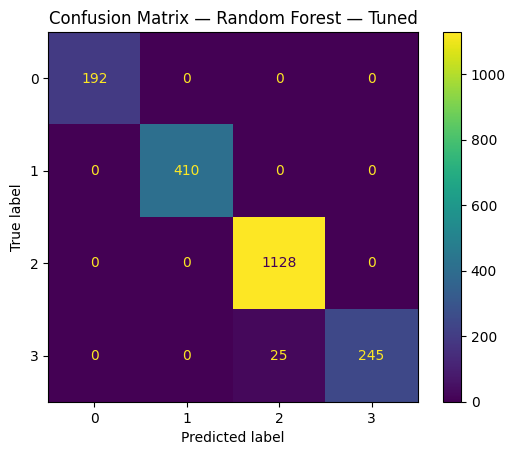

(0.9875, 0.9851240513656504)

In [ ]:
print("Best Random Forest params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

evaluate_classifier(best_rf, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Random Forest — Tuned", show_cm=True)

Best SVM params: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
=== SVM — Tuned ===
Accuracy     : 0.991
F1 Macro     : 0.990
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.99      0.99      0.99      1128
           3       0.97      0.97      0.97       270

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



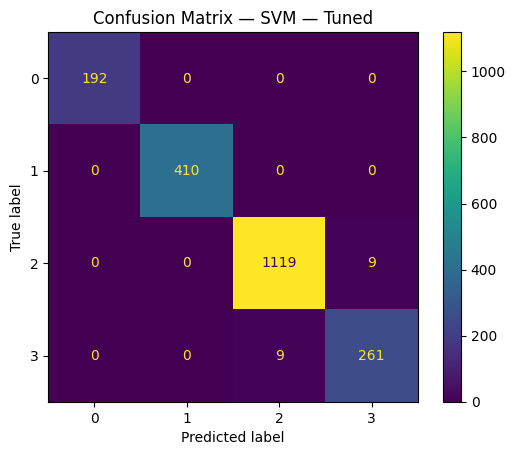

(0.991, 0.9896719858156029)

In [ ]:
#SVM Tuning
param_svm = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

grid_svm = GridSearchCV(
    SVC(),
    param_svm,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_svm.fit(X_train_m, y_train_m)

print("Best SVM params:", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_

evaluate_classifier(best_svm, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="SVM — Tuned", show_cm=True)


=== Naive Bayes ===
Accuracy     : 0.958
F1 Macro     : 0.952
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       410
           2       0.96      0.96      0.96      1128
           3       0.84      0.85      0.85       270

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000



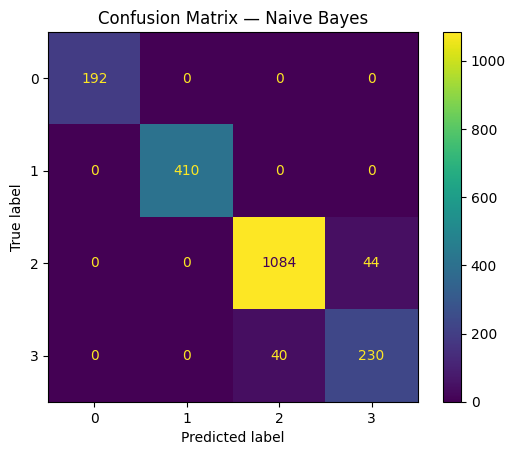

(0.958, 0.952072014418556)

In [ ]:
#Naive Bayes not really related to tuning
nb = GaussianNB()

evaluate_classifier(nb, X_train_m, y_train_m, X_test_m, y_test_m,
                    title="Naive Bayes", show_cm=True)


ROC-AUC: 1.0


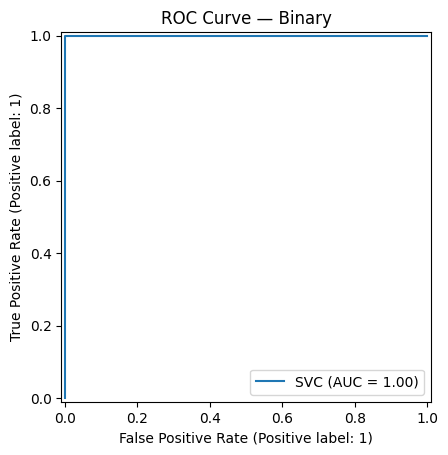

In [ ]:
#ROC-AUC binary only
from sklearn.metrics import roc_auc_score, RocCurveDisplay

model = best_svm #( we will replace depending on which model we choose at the end)

model.fit(X_train_b, y_train_b)
y_prob = model.decision_function(X_test_b)

roc = roc_auc_score(y_test_b, y_prob)
print("ROC-AUC:", roc)

RocCurveDisplay.from_estimator(model, X_test_b, y_test_b)
plt.title("ROC Curve — Binary")
plt.show()


In [ ]:
print("Test accuracy:", model.score(X_test_b, y_test_b))

Test accuracy: 1.0


# Phase 7 - PCA

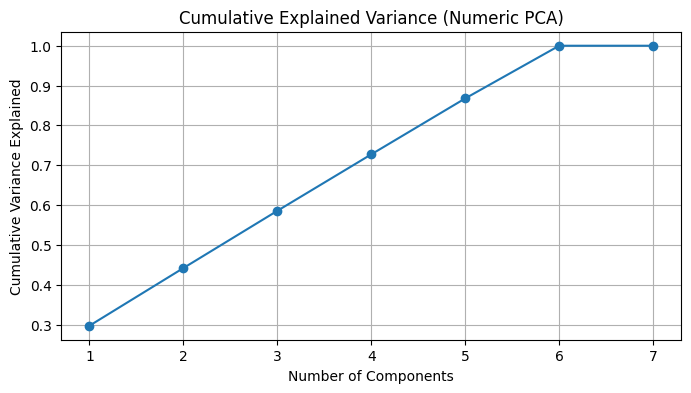

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#PCA NUMÉRIQUE (multiclass)
pca_num = PCA()
X_train_m_num = X_train_m[num_cols]   # Already scaled
X_test_m_num = X_test_m[num_cols]

pca_num.fit(X_train_m_num)

# Explained variance plot
plt.figure(figsize=(8,4))
plt.plot(range(1, len(num_cols)+1), pca_num.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Cumulative Explained Variance (Numeric PCA)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()


PCA on numeric features shows that the first 6 components retain nearly 100% of the variance, indicating strong correlation among variables like caffeine intake, heart rate, BMI, and sleep-related metrics. Therefore it helps stabilize linear models (SVM, Logistic Regression) by removing multicollinearity, but provides limited benefit for tree-based models such as Random Forest which already handle correlated features.

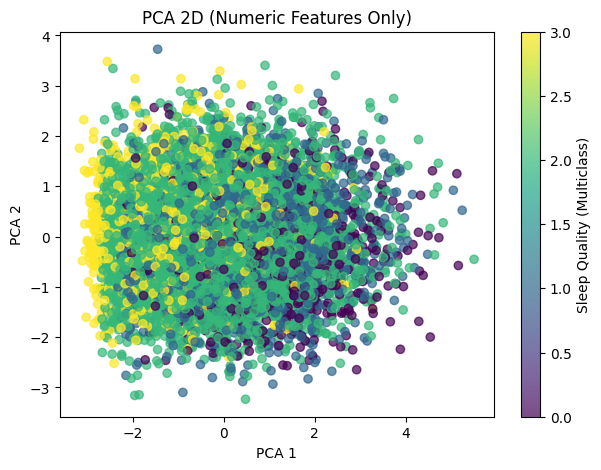

In [ ]:
# PCA with 2 components
pca_num_2d = PCA(n_components=2)
X_train_num_2d = pca_num_2d.fit_transform(X_train_m_num)

plt.figure(figsize=(7,5))
plt.scatter(X_train_num_2d[:,0], X_train_num_2d[:,1],
            c=y_train_m, cmap='viridis', alpha=0.7)
plt.colorbar(label="Sleep Quality (Multiclass)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA 2D (Numeric Features Only)")
plt.show()


The PCA 2D projection of numeric features shows strong overlap between sleep-quality classes, indicating that numeric variables alone do not provide clear linear separability. This suggests that sleep quality is influenced by more complex or nonlinear relationships, and that categorical variables and non-linear models ( RandomForest, SVM) are needed to achieve good performance.

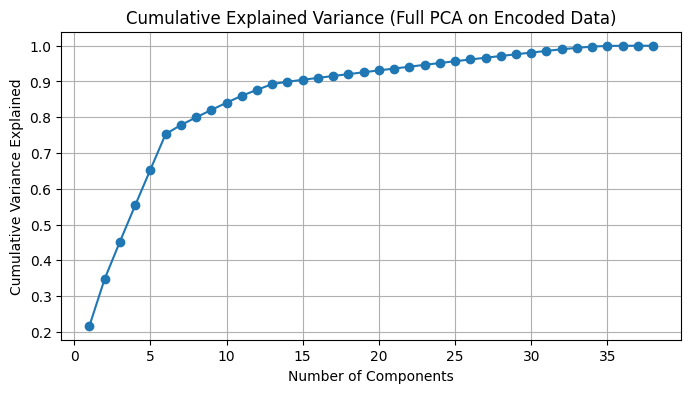

In [ ]:
# --- PCA FULL DATA (multiclass) ---
pca_full = PCA()
pca_full.fit(X_train_m)   # X_train_m already scaled for numeric columns

plt.figure(figsize=(8,4))
plt.plot(range(1, X_train_m.shape[1]+1),
         pca_full.explained_variance_ratio_.cumsum(),
         marker='o')
plt.title("Cumulative Explained Variance (Full PCA on Encoded Data)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()


The full PCA applied to all numerical and one-hot encoded categorical variables shows that approximately 90% of the dataset’s variance is captured by only ~15 principal components, despite the original 40+ feature dimensions

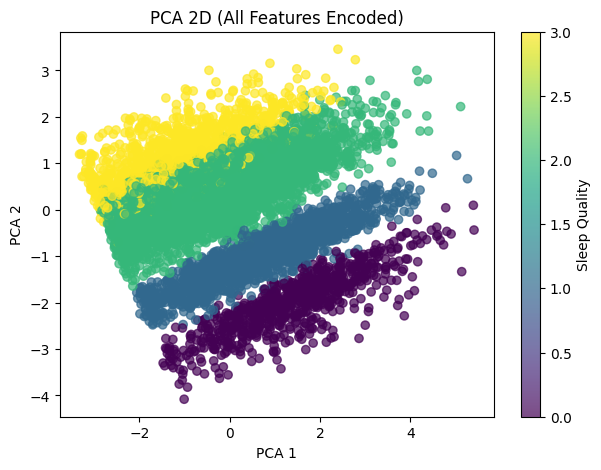

In [ ]:
pca_full_2d = PCA(n_components=2)
X_train_full_2d = pca_full_2d.fit_transform(X_train_m)

plt.figure(figsize=(7,5))
plt.scatter(X_train_full_2d[:,0], X_train_full_2d[:,1],
            c=y_train_m, cmap='viridis', alpha=0.7)
plt.colorbar(label="Sleep Quality")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA 2D (All Features Encoded)")
plt.show()


# TEST PHASE 8

In [ ]:
# @title
from sklearn.linear_model import LogisticRegression

# Refit a clean multiclass logistic regression model
log_reg_multi = LogisticRegression(max_iter=500, multi_class='multinomial')
log_reg_multi.fit(X_train_m, y_train_m)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [ ]:
# @title
import numpy as np

# Probabilities for each class on the test set
proba_test = log_reg_multi.predict_proba(X_test_m)
proba_test[:5]  # just to inspect the first rows

array([[3.45357657e-10, 7.46044480e-04, 9.89943567e-01, 9.31038824e-03],
       [1.11958520e-09, 1.25402484e-02, 9.76098166e-01, 1.13615845e-02],
       [8.23349300e-12, 3.63947062e-05, 1.67736105e-01, 8.32227500e-01],
       [2.91335882e-10, 2.34090289e-04, 9.99760674e-01, 5.23536138e-06],
       [3.60345943e-09, 1.65753942e-03, 9.98342455e-01, 1.48929470e-09]])

In [ ]:
# @title
# Numeric score for each class (Poor, Fair, Good, Excellent)
class_scores = np.array([0, 1, 2, 3])

# Expected score = sum_k P(class=k) * score_k
sleep_score_pred = proba_test @ class_scores   # shape (n_samples,)
sleep_score_pred[:5]

array([2.00856434, 1.99882133, 2.83219111, 1.99977114, 1.99834245])

In [ ]:
# @title
y_true_ord = y_test_m.values  # already 0,1,2,3
y_true_ord[:5]

array([2, 2, 3, 2, 2])

In [ ]:
# @title
class_scores_normalized = class_scores / 3.0
sleep_score_pred_norm = proba_test @ class_scores_normalized
y_true_ord_norm = y_true_ord / 3.0

In [ ]:
# @title
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_true_ord, sleep_score_pred)
rmse = np.sqrt(mean_squared_error(y_true_ord, sleep_score_pred))
r2 = r2_score(y_true_ord, sleep_score_pred)

print(f"MAE  (0–3 scale): {mae:.3f}")
print(f"RMSE (0–3 scale): {rmse:.3f}")
print(f"R²              : {r2:.3f}")

MAE  (0–3 scale): 0.024
RMSE (0–3 scale): 0.085
R²              : 0.989


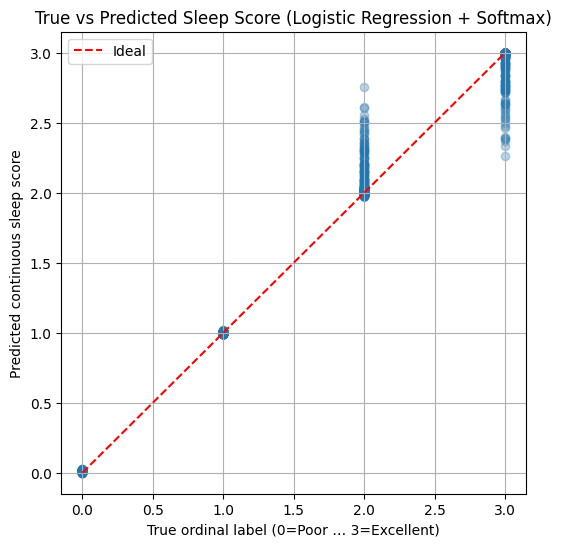

In [ ]:
# @title
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_true_ord, sleep_score_pred, alpha=0.3)
plt.plot([0, 3], [0, 3], 'r--', label="Ideal")  # diagonal
plt.xlabel("True ordinal label (0=Poor … 3=Excellent)")
plt.ylabel("Predicted continuous sleep score")
plt.title("True vs Predicted Sleep Score (Logistic Regression + Softmax)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# @title
# Round the continuous score to nearest class
rounded_pred = np.rint(sleep_score_pred).astype(int)

from sklearn.metrics import accuracy_score, f1_score

acc_soft = accuracy_score(y_true_ord, rounded_pred)
f1_soft = f1_score(y_true_ord, rounded_pred, average='macro')

print(f"Accuracy after rounding: {acc_soft:.3f}")
print(f"F1 macro after rounding: {f1_soft:.3f}")

Accuracy after rounding: 0.992
F1 macro after rounding: 0.990


# Pourcentage

In [ ]:
from sklearn.linear_model import LogisticRegression

# Refit a clean multinomial logistic regression model on multiclass task
log_reg_multi = LogisticRegression(max_iter=500, multi_class='multinomial')
log_reg_multi.fit(X_train_m, y_train_m)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [ ]:
proba_test = log_reg_multi.predict_proba(X_test_m)
proba_test[:5]  # inspect a few rows

array([[3.45357657e-10, 7.46044480e-04, 9.89943567e-01, 9.31038824e-03],
       [1.11958520e-09, 1.25402484e-02, 9.76098166e-01, 1.13615845e-02],
       [8.23349300e-12, 3.63947062e-05, 1.67736105e-01, 8.32227500e-01],
       [2.91335882e-10, 2.34090289e-04, 9.99760674e-01, 5.23536138e-06],
       [3.60345943e-09, 1.65753942e-03, 9.98342455e-01, 1.48929470e-09]])

In [ ]:
# Define percentage weights for each class (Poor, Fair, Good, Excellent)
class_scores_pct = np.array([0, 33, 66, 100])

# Compute continuous score for each sample
sleep_quality_percentage = proba_test @ class_scores_pct

sleep_quality_percentage[:10]

#Score=i∑​P(class=i)×class_percentage(i)

array([66.29193371, 65.9724656 , 94.29453399, 65.992453  , 65.94530101,
        0.10464878, 65.98970239, 65.97590879, 33.00116627, 33.23667173])

In [ ]:
# Convert true ordinal labels (0-3) to percentages (0,33,66,100)
true_pct = y_test_m.map({0: 0, 1: 33, 2: 66, 3: 100}).values

true_pct[:10]

array([ 66,  66, 100,  66,  66,   0,  66,  66,  33,  33])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(true_pct, sleep_quality_percentage)
rmse = np.sqrt(mean_squared_error(true_pct, sleep_quality_percentage))
r2 = r2_score(true_pct, sleep_quality_percentage)

print(f"MAE (%)  : {mae:.3f}")
print(f"RMSE (%) : {rmse:.3f}")
print(f"R²       : {r2:.3f}")

MAE (%)  : 0.829
RMSE (%) : 2.906
R²       : 0.988


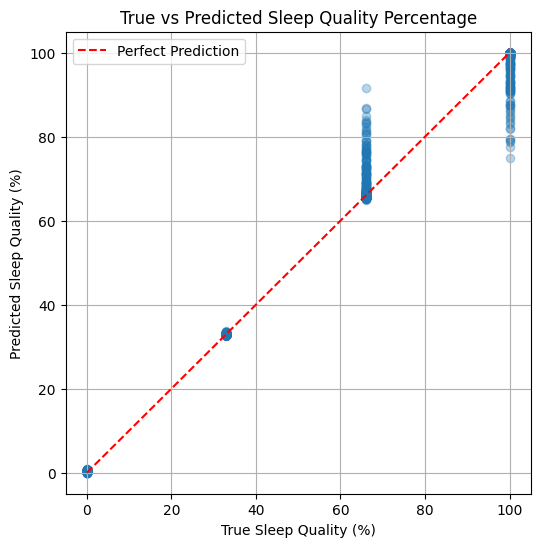

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(true_pct, sleep_quality_percentage, alpha=0.3)
plt.plot([0, 100], [0, 100], 'r--', label="Perfect Prediction")
plt.xlabel("True Sleep Quality (%)")
plt.ylabel("Predicted Sleep Quality (%)")
plt.title("True vs Predicted Sleep Quality Percentage")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Fit model on full multiclass dataset
log_reg_full = LogisticRegression(max_iter=500, multi_class='multinomial')
log_reg_full.fit(X, y_multi)  # X and y_multi are the FULL data

# Generate probabilities for all rows
proba_full = log_reg_full.predict_proba(X)

# Add percentage score to the dataset
df["Predicted_Sleep_Quality_Percentage"] = proba_full @ class_scores_pct

df.head()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,...,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student,Health_Issues_Moderate,Health_Issues_Severe,Health_Issues_nan,Predicted_Sleep_Quality_Percentage
0,40,3.5,328.1,7.5,Good,24.9,78,14.5,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,66.284527
1,33,1.0,94.1,6.2,Good,20.0,67,11.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,66.502542
2,42,5.3,503.7,5.9,Fair,22.7,59,11.2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,36.911295
3,53,2.6,249.2,7.3,Good,24.7,71,6.6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,66.257647
4,32,3.1,298.0,5.3,Fair,24.1,76,8.5,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,32.368546


Explaining:

If for example we have :

Fair: 10%
Good: 87%
Poor: 3%

Score =0.03×0 + 0.10×33 + 0.87×66 + 0.00×100
≈ 61.6% predicted sleep quality
This gives us:

* A continuous prediction
* More nuanced than just a class
* Matches what your teacher asked for




In [ ]:
df

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,...,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student,Health_Issues_Moderate,Health_Issues_Severe,Health_Issues_nan,Predicted_Sleep_Quality_Percentage
0,40,3.5,328.1,7.5,Good,24.9,78,14.5,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,66.284527
1,33,1.0,94.1,6.2,Good,20.0,67,11.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,66.502542
2,42,5.3,503.7,5.9,Fair,22.7,59,11.2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,36.911295
3,53,2.6,249.2,7.3,Good,24.7,71,6.6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,66.257647
4,32,3.1,298.0,5.3,Fair,24.1,76,8.5,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,32.368546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50,2.1,199.8,6.0,Fair,30.5,50,10.1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39.734088
9996,18,3.4,319.2,5.8,Fair,19.1,71,11.6,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.207677
9997,26,1.6,153.4,7.1,Good,25.1,66,13.7,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,67.035641
9998,40,3.4,327.1,7.0,Good,19.3,80,0.1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,66.833904


In [ ]:
df[["Sleep_Quality_Multi", "Predicted_Sleep_Quality_Percentage"]].head(50)

,Sleep_Quality_Multi,Predicted_Sleep_Quality_Percentage
0,2,66.284527
1,2,66.502542
2,1,36.911295
3,2,66.257647
4,1,32.368546
5,2,65.644354
6,2,83.563472
7,1,37.449099
8,2,72.407936
9,2,58.987297


We notice that for 83 percent we have two classes (2 and 3) whereas we should be having 83 at class 2 and from 88 class 3.

In [ ]:
# Compute statistics per true class
interval_stats = df.groupby("Sleep_Quality_Multi")["Predicted_Sleep_Quality_Percentage"].agg(
    ["min", "max", "mean", "std", "count"]
)

interval_stats


,min,max,mean,std,count
Sleep_Quality_Multi,,,,,
0,0.000018,27.285904,2.688916,4.681100,961
1,5.125184,82.021185,34.660052,5.340491,2050
2,45.140778,99.617102,68.845539,6.238681,5637
3,62.397513,99.993739,86.602375,10.435119,1352


- Poor stays in low range → model understands the class.
- Fair extends up to 80 → borderline cases exist.
- Good extends into 90 → some are almost Excellent.
- Excellent starts around 62 → some are borderline Good.

<Axes: xlabel='Sleep_Quality_Multi', ylabel='Predicted_Sleep_Quality_Percentage'>

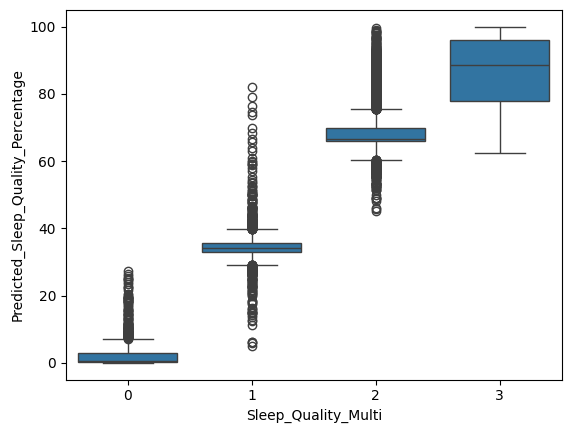

In [ ]:
import seaborn as sns
sns.boxplot(x=df["Sleep_Quality_Multi"], y=df["Predicted_Sleep_Quality_Percentage"])

In [ ]:
# Select only the desired columns
selected_columns = ["Sleep_Quality_Multi", "Predicted_Sleep_Quality_Percentage", "Sleep_Quality"]

# Display 10 random samples
df[selected_columns].sample(10)


,Sleep_Quality_Multi,Predicted_Sleep_Quality_Percentage,Sleep_Quality
7664,1,34.899410,Fair
9223,1,32.373732,Fair
9888,2,66.103306,Good
5685,3,90.985681,Excellent
2592,2,67.142850,Good
517,0,17.788458,Poor
130,2,80.644269,Good
2239,1,34.278603,Fair
7950,2,85.899227,Good
259,0,1.183522,Poor


Additional column with percentage of each class ( maybe we will understand which is highest and therefore explain the percentage )


NEWWW